In [6]:
import pandas as pd
import os
import h5py
import seaborn as sns
import scanpy as sc
import anndata as ad
from datetime import datetime

In [2]:
data_dir = "/lustre/groups/ml01/workspace/ot_perturbation/data/pbmc/metrics_new_donor"

In [3]:
def get_cytokine_in_train(file: str) -> int:
    PREDS_DIR = "/lustre/groups/ml01/workspace/ot_perturbation/models/otfm/pbmc_new_donor"
    file_path = os.path.join(PREDS_DIR, f"{file}_preds.h5ad")
    with h5py.File(file_path, "r") as f:
    
        if "uns" in f:
            uns = {}
            for key in f["uns"].keys():
                uns[key] = f["uns"][key][()]
        else:
            raise ValueError(f"Error for {file}")

    out = uns['cytokine_in_train']
    return [out[i].decode('UTF-8') for i in range(len(out))]

In [7]:
dfs = []
for el in os.listdir(data_dir):
    if el.endswith("metrics.csv"):
        file_path = os.path.join(data_dir, el)
        df_tmp = pd.read_csv(file_path, index_col=0).T
        df_tmp["donor_cytokine"] = df_tmp.index
        df_tmp["donor"] = df_tmp.apply(lambda x: x["donor_cytokine"].split("_")[0], axis=1)
        df_tmp["cytokine"] = df_tmp.apply(lambda x: x["donor_cytokine"].split("_")[1], axis=1)
        file = f"{df_tmp['wandb_name'].values[0]}_{df_tmp['donor'].values[0]}_{df_tmp['cytokine'].values[0]}_{df_tmp['cytokine_in_train'].values[0]}"
        df_tmp["num_cytokines_in_train"] = df_tmp["cytokine_in_train"]
        df_tmp["cytokine_in_train"] = str(get_cytokine_in_train(file))
        modification_time = os.path.getmtime(file_path)
        df_tmp["date"] = datetime.fromtimestamp(modification_time).strftime('%Y-%m-%d %H:%M:%S')
        
        dfs.append(df_tmp)
        


In [8]:
len(dfs)

2880

In [9]:
df = pd.concat(dfs)

In [10]:
for el in df.columns:
    try:
        df[el] = df[el].astype("float")
    except:
        continue

In [11]:
df["donor_cytokine"] = df.index
df["donor"] = df.apply(lambda x: x["donor_cytokine"].split("_")[0], axis=1)
df["cytokine"] = df.apply(lambda x: x["donor_cytokine"].split("_")[1], axis=1)

In [14]:
df["num_cytokines_in_train"]

Donor5_M-CSF          33.0
Donor7_FasL           65.0
Donor12_IL-32-beta     2.0
Donor3_FasL           33.0
Donor2_OX40L          17.0
                      ... 
Donor3_CD27L           2.0
Donor2_M-CSF           9.0
Donor5_OX40L          17.0
Donor8_IFN-omega       9.0
Donor2_BAFF            1.0
Name: num_cytokines_in_train, Length: 2880, dtype: float64

In [15]:
df_other = df[df["num_cytokines_in_train"]!=1.0]
df_1 = df[df["num_cytokines_in_train"]==1.0]
df_1["new_run"] = df_1.apply(lambda x: True if x["date"]>"2025-01-20" else False, axis=1)
df_1["new_run"].value_counts()

/tmp/ipykernel_1472336/386908205.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_1["new_run"] = df_1.apply(lambda x: True if x["date"]>"2025-01-20" else False, axis=1)
/tmp/ipykernel_1472336/386908205.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["new_run"] = df_1.apply(lambda x: True if x["date"]>"2025-01-20" else False, axis=1)


new_run
True     120
False    120
Name: count, dtype: int64

In [24]:
df_1_final = df_1[df_1["new_run"]]
df_final = pd.concat((df_1_final, df_other))

In [29]:
df_final.to_csv(os.path.join(data_dir, "metrics_new_donor.csv"))

In [25]:
df_final["donor"].value_counts()

donor
Donor8     230
Donor12    230
Donor7     230
Donor5     230
Donor2     230
Donor11    230
Donor10    230
Donor1     230
Donor4     230
Donor9     230
Donor6     230
Donor3     230
Name: count, dtype: int64

In [26]:
df_final["cytokine"].value_counts()

cytokine
IL-1Ra        276
IL-32-beta    276
FasL          276
OX40L         276
BAFF          276
M-CSF         276
ADSF          276
CD27L         276
IFN-gamma     276
IFN-omega     276
Name: count, dtype: int64

In [27]:
df_final["num_cytokines_in_train"].value_counts()

num_cytokines_in_train
33.0    360
9.0     360
65.0    360
2.0     360
17.0    360
3.0     360
5.0     360
1.0     120
81.0    120
Name: count, dtype: int64

In [18]:
[el for el in df.columns if "cytokine" in el]

['cytokine_in_train', 'donor_cytokine', 'cytokine']

In [33]:
metrics = ['mean_decoded_r_sq_per_cell_type', 'mean_e_distance_per_cell_type',
       'mean_mmd_per_cell_type', 'mean_sdiv_10_per_cell_type',
       'mean_sdiv_100_per_cell_type', 'mean_deg_r_sq_per_cell_type',
       'mean_deg_e_distance_per_cell_type', 'mean_deg_mmd_per_cell_type',
       'mean_deg_sdiv_10_per_cell_type', 'mean_deg_sdiv_100_per_cell_type','decoded_ood_r_squared',
         'ood_e_distance',
         'ood_mmd',
         'ood_sdiv_10',
         'ood_sdiv_100',]

In [37]:
len(metrics)

15

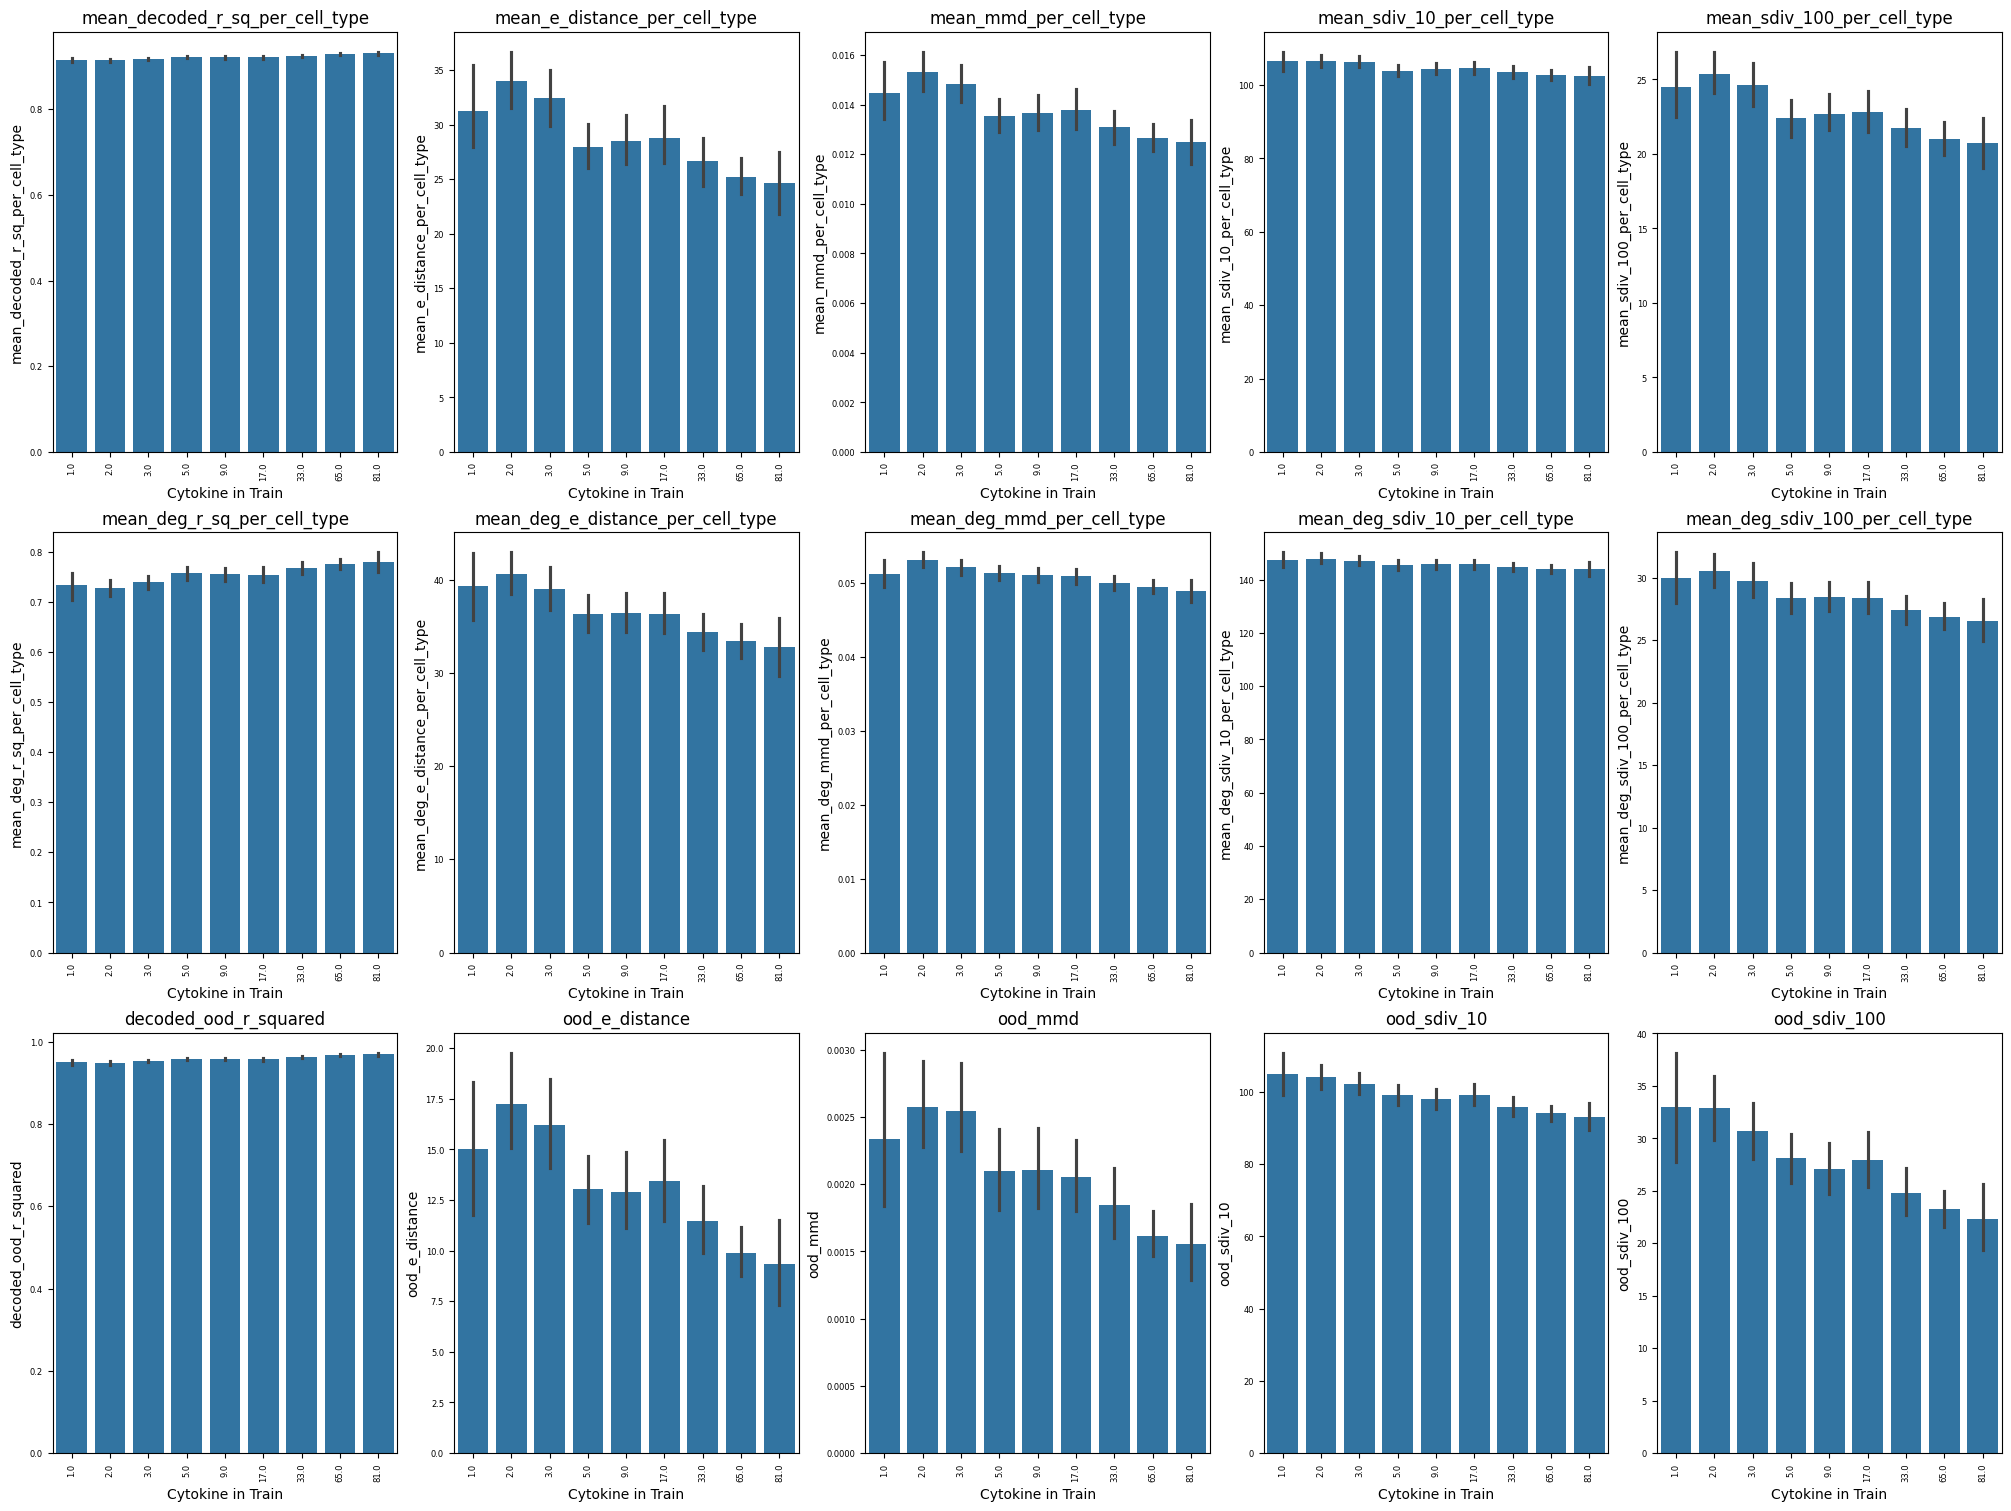

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Number of rows and columns for subplots (adjust based on the number of metrics)
n_rows, n_cols = 3, 5  # Example for a 3x4 grid; adjust as needed

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15), constrained_layout=True)
axes = axes.flatten()  # Flatten the axes for easier iteration

# Iterate through the metrics and plot each barplot
for idx, metric in enumerate(metrics):
    if idx >= len(axes):
        break  # Stop if there are more metrics than subplot spaces

    ax = axes[idx]
    sns.barplot(data=df, x="cytokine_in_train", y=metric, ax=ax)
    ax.set_title(metric, fontsize=12)
    ax.set_xlabel("Cytokine in Train", fontsize=10)
    ax.set_ylabel(metric, fontsize=10)
    ax.tick_params(axis='x', labelsize=6, rotation=90)
    ax.tick_params(axis='y', labelsize=6)

# Remove unused axes if there are fewer metrics than subplot slots
for i in range(len(metrics), len(axes)):
    fig.delaxes(axes[i])


# Display the plot
plt.show()


In [32]:
list(df.columns)

['mean_decoded_r_sq_per_cell_type',
 'mean_e_distance_per_cell_type',
 'mean_mmd_per_cell_type',
 'mean_sdiv_10_per_cell_type',
 'mean_sdiv_100_per_cell_type',
 'mean_deg_r_sq_per_cell_type',
 'mean_deg_e_distance_per_cell_type',
 'mean_deg_mmd_per_cell_type',
 'mean_deg_sdiv_10_per_cell_type',
 'mean_deg_sdiv_100_per_cell_type',
 'decoded_r_squared_CD4 Naive',
 'decoded_r_squared_B Naive',
 'decoded_r_squared_CD8 Naive',
 'decoded_r_squared_CD4 Memory',
 'decoded_r_squared_Treg',
 'decoded_r_squared_NKT',
 'decoded_r_squared_CD8 Memory',
 'decoded_r_squared_MAIT',
 'decoded_r_squared_CD16 Mono',
 'decoded_r_squared_CD14 Mono',
 'decoded_r_squared_CD56-dim NK',
 'decoded_r_squared_B Intermediate/Memory',
 'decoded_r_squared_cDC',
 'e_distance_CD4 Naive',
 'e_distance_B Naive',
 'e_distance_CD8 Naive',
 'e_distance_CD4 Memory',
 'e_distance_Treg',
 'e_distance_NKT',
 'e_distance_CD8 Memory',
 'e_distance_MAIT',
 'e_distance_CD16 Mono',
 'e_distance_CD14 Mono',
 'e_distance_CD56-dim NK',

<Axes: xlabel='cytokine_in_train', ylabel='decoded_ood_r_squared'>

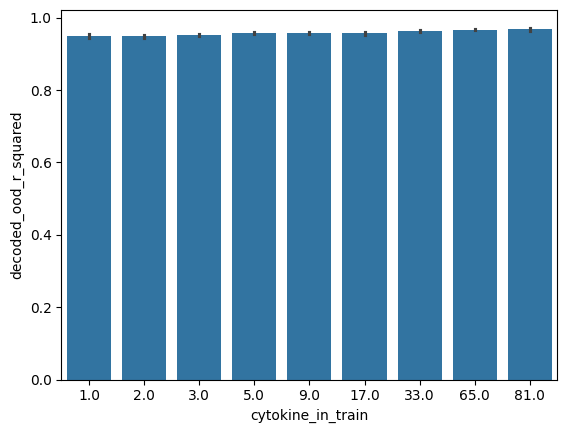

In [27]:
sns.barplot(df, x="cytokine_in_train", y="decoded_ood_r_squared")

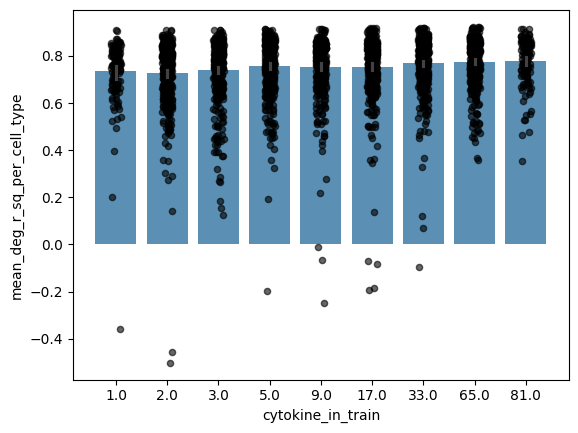

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create the bar plot
sns.barplot(data=df, x="cytokine_in_train", y="mean_deg_r_sq_per_cell_type", alpha=0.8)

# Add jittered points
jitter = 0.1  # Adjust jitter size as needed
x_positions = np.arange(len(df["cytokine_in_train"].unique()))
x_jittered = x_positions[df["cytokine_in_train"].astype('category').cat.codes] + np.random.uniform(-jitter, jitter, size=len(df))

plt.scatter(x_jittered, df["mean_deg_r_sq_per_cell_type"], color='black', alpha=0.6, s=20)

plt.show()


<Axes: xlabel='cytokine_in_train', ylabel='mean_deg_r_sq_per_cell_type'>

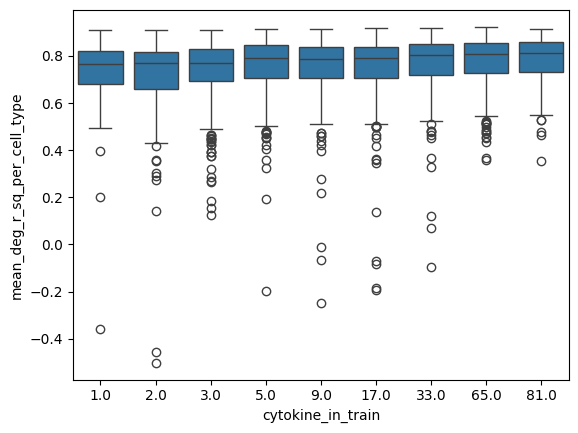

In [42]:
sns.boxplot(df, x="cytokine_in_train", y="mean_deg_r_sq_per_cell_type")

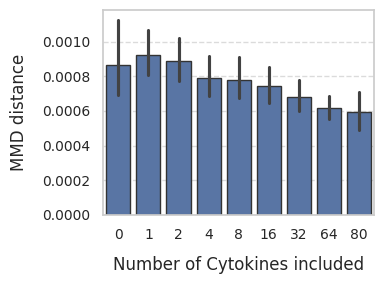

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style for cleaner plots
sns.set_theme(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(4, 3))  # Adjust the figure size
bar_plot = sns.barplot(
    data=df,
    x="num_cytokines",
    y="ood_mmd",
    edgecolor=".2"      # Add subtle edges to bars for clarity
)

# Customize plot appearance
bar_plot.set_xlabel("Number of Cytokines included", fontsize=12, labelpad=10)
bar_plot.set_ylabel("MMD distance", fontsize=12, labelpad=10)

# Rotate x-axis labels if needed
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add gridlines for y-axis
bar_plot.yaxis.grid(True, linestyle='--', alpha=0.7)
bar_plot.xaxis.grid(False)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [207]:
df_g = pd.DataFrame(df.groupby(["cytokine", "donor"])["decoded_ood_r_squared"].mean())

In [208]:
df_g.sort_values("decoded_ood_r_squared")

decoded_ood_r_squared
cytokine   donor                         
IL-32-beta Donor4                0.835383
           Donor3                0.845340
           Donor2                0.894580
IL-1Ra     Donor4                0.903931
OX40L      Donor6                0.904025
...                                   ...
ADSF       Donor4                0.980561
FasL       Donor3                0.981056
           Donor4                0.981228
BAFF       Donor10               0.981864
FasL       Donor10               0.983463

[120 rows x 1 columns]

In [3]:
import os
import pandas as pd
data_dir = "/lustre/groups/ml01/workspace/ot_perturbation/data/pbmc/metrics_new_donor"
df = pd.read_csv(os.path.join(data_dir, "metrics_new_donor.csv"))


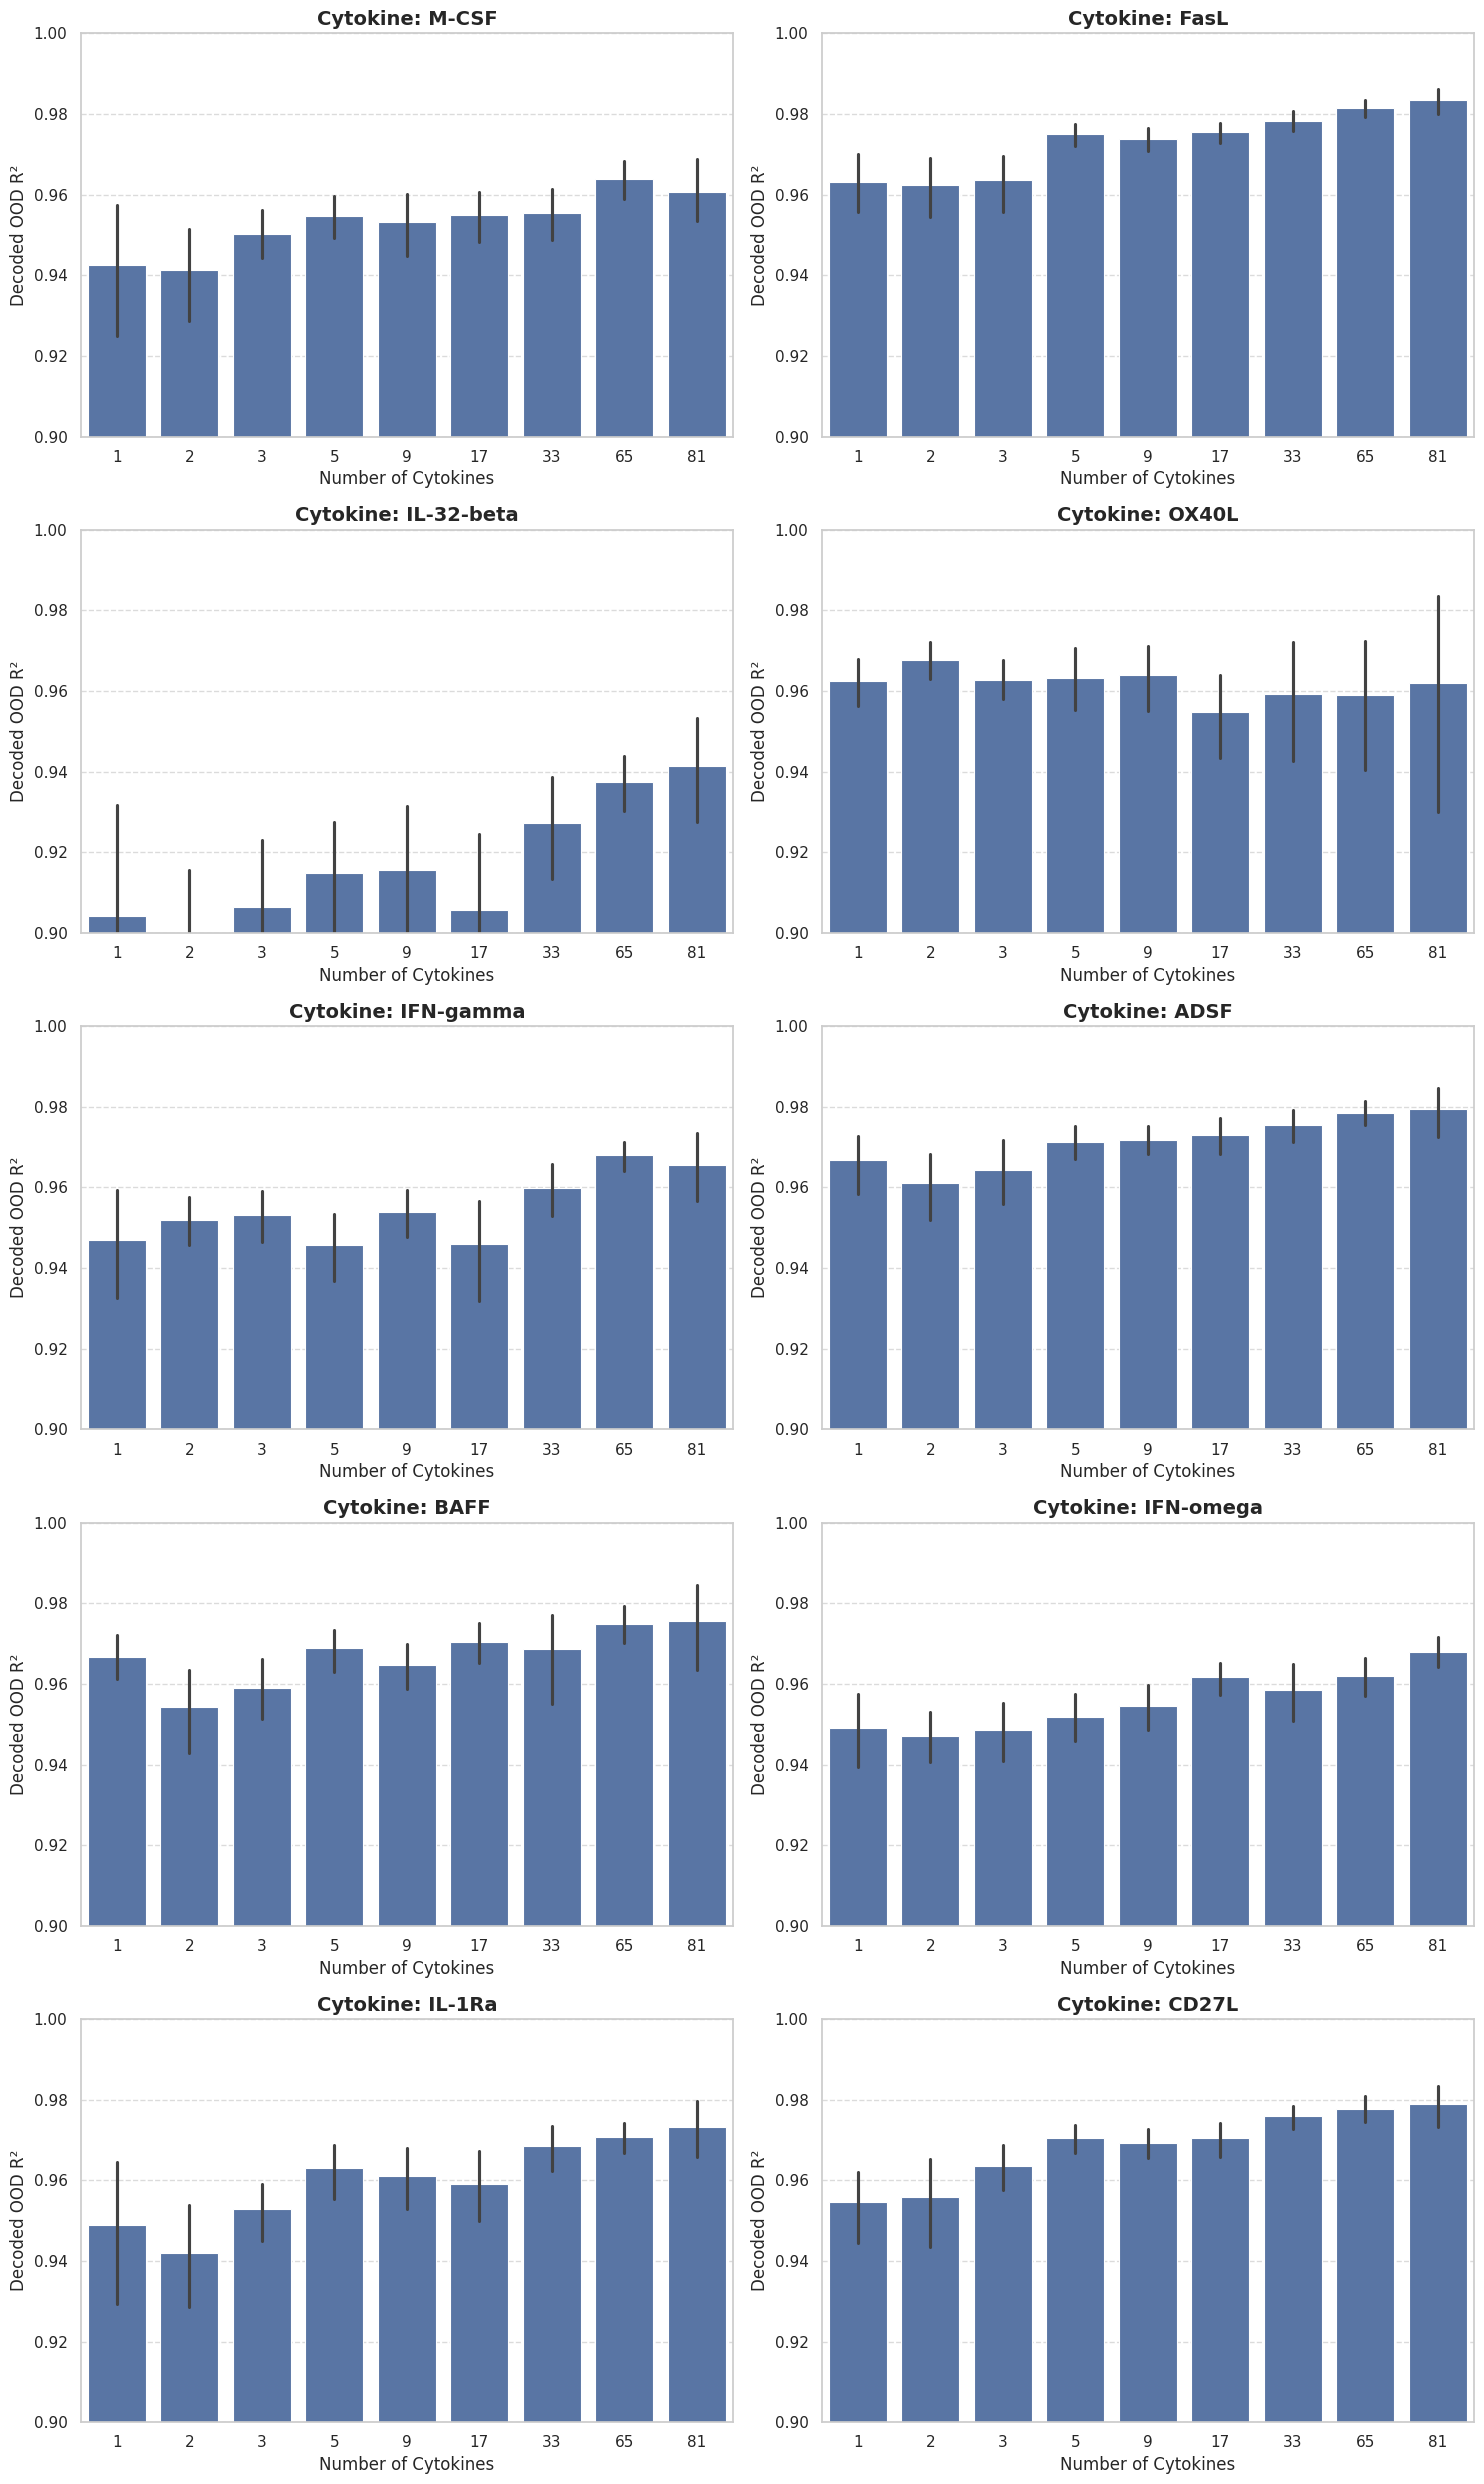

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
unique_cytokines = df["cytokine"].unique()
num_cytokines = len(unique_cytokines)

# Set up the subplots with 2 columns
fig, axes = plt.subplots(nrows=(num_cytokines + 1) // 2, ncols=2, figsize=(15, num_cytokines * 2.5))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Seaborn style
sns.set_theme(style="whitegrid")

for i, cyto in enumerate(unique_cytokines):
    ax = axes[i]
    df_tmp = df[df["cytokine"] == cyto]
    sns.barplot(
        data=df_tmp,
        x="num_cytokines_in_train",
        y="decoded_ood_r_squared",
        ax=ax,
        linewidth=0.8,   # Subtle edge definition
    )
    ax.set_title(f'Cytokine: {cyto}', fontsize=14, weight='bold')
    ax.set_xlabel("Number of Cytokines", fontsize=12)
    ax.set_ylabel("Decoded OOD R²", fontsize=12)
    ax.set_ylim(0.9, 1.0)
    ax.xaxis.grid(False)
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


# For all donors

In [78]:
df.head()

,cytokine,donor,ood_mmd,ood_e_distance,decoded_ood_r_squared,num_cytokines
0,OX40L,Donor5,0.000470,19.378363,0.949410,2
1,IL-32-beta,Donor3,0.002449,87.372482,0.850566,1
2,OX40L,Donor1,0.000654,18.460045,0.966312,16
3,IFN-omega,Donor4,0.002454,32.896013,0.938818,8
4,M-CSF,Donor4,0.002637,16.371132,0.956348,8


In [14]:
df[df["cytokine"]=="FasL"].sort_values("decoded_ood_r_squared")[["num_cytokines_in_train", "decoded_ood_r_squared", "wandb_name", "cytokine", "donor"]]

,num_cytokines_in_train,decoded_ood_r_squared,wandb_name,cytokine,donor
294,3,0.868638,driven-puddle-35,FasL,Donor1
251,2,0.882950,summer-donkey-196,FasL,Donor8
1457,2,0.903001,sleek-puddle-221,FasL,Donor9
2197,3,0.911355,stilted-sound-83,FasL,Donor3
1817,2,0.914230,devoted-elevator-198,FasL,Donor8
...,...,...,...,...,...
1302,81,0.989630,soft-dawn-266,FasL,Donor10
2025,65,0.990551,laced-feather-92,FasL,Donor3
1023,65,0.990786,electric-river-91,FasL,Donor3
699,65,0.991162,earnest-plant-93,FasL,Donor3


In [21]:
for file in os.listdir("/lustre/groups/ml01/workspace/ot_perturbation/models/otfm/pbmc_new_donor"):
    if "earnest-plant-93" in file:
        print(file)

earnest-plant-93_Donor3_BAFF_65_preds.h5ad
earnest-plant-93_Donor3_CD27L_65.csv
earnest-plant-93_Donor3_CD27L_65_preds.h5ad
earnest-plant-93_Donor3_IFN-omega_65_preds.h5ad
earnest-plant-93_Donor3_OX40L_65_preds.h5ad
earnest-plant-93_Donor3_OX40L_65.csv
earnest-plant-93_Donor3_IFN-gamma_65_preds.h5ad
earnest-plant-93_Donor3_IL-1Ra_65.csv
earnest-plant-93_Donor3_FasL_65.csv
earnest-plant-93_Donor3_ADSF_65_preds.h5ad
earnest-plant-93_Donor3_ADSF_65.csv
earnest-plant-93_Donor3_IL-32-beta_65.csv
earnest-plant-93_Donor3_FasL_65_preds.h5ad
earnest-plant-93_Donor3_IL-1Ra_65_preds.h5ad
earnest-plant-93_Donor3_BAFF_65.csv
earnest-plant-93_Donor3_M-CSF_65_preds.h5ad
earnest-plant-93_Donor3_IL-32-beta_65_preds.h5ad
earnest-plant-93_Donor3_IFN-gamma_65.csv
earnest-plant-93_Donor3_IFN-omega_65.csv
earnest-plant-93_CellFlow.pkl
earnest-plant-93_Donor3_M-CSF_65.csv


In [ ]:
evout-fog-97_Donor3_FasL_81_preds.h5ad

ValueError: Could not interpret value `cytokines_in_train` for `x`. An entry with this name does not appear in `data`.

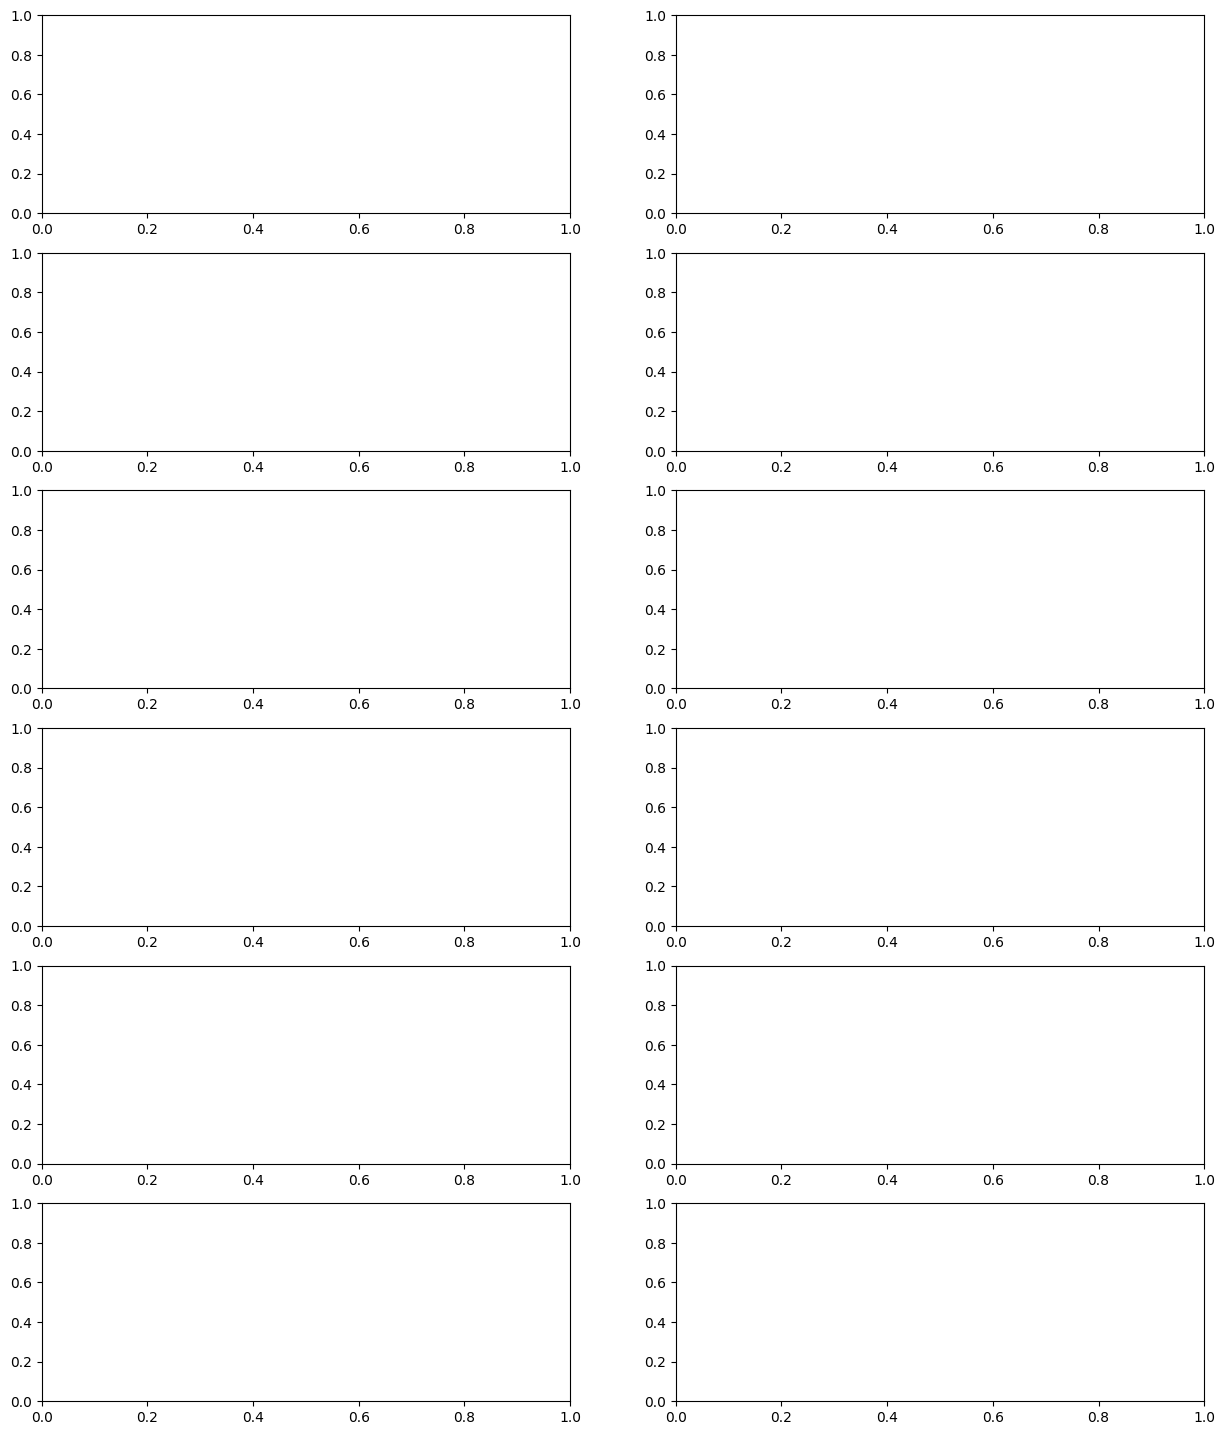

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame
unique_donors = df["donor"].unique()
num_cytokines = len(unique_donors)

# Set up the subplots with 2 columns
fig, axes = plt.subplots(nrows=(num_cytokines + 1) // 2, ncols=2, figsize=(15, num_cytokines * 3 // 2))

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, cyto in enumerate(unique_donors):
    ax = axes[i]
    df_tmp = df[df["donor"] == cyto]
    sns.boxplot(data=df_tmp, x="cytokines_in_train", y="decoded_ood_r_squared", ax=ax)
    ax.set_title(f'donor: {cyto}')
    ax.set_xlabel("Number of cytokines")
    ax.set_ylabel("Decoded OOD R^2")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Feature importance

In [46]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler


def get_cytokine_importance(df: pd.DataFrame, cytokine: str, target_variable: str = "decoded_ood_r_squared", alpha: float = 0.1):
    all_cytokines_in_train = list(
        set(el for i in range(len(df)) for el in df.iloc[i]["cytokines_in_train"])
    )

    df_d = df[df["cytokine"]==cytokine]
    for d in all_cytokines_in_train:
        df_d[f"{d}_present"] = df_d.apply(lambda x: d in x["cytokines_in_train"], axis=1)

    for num_cytokines in df["num_cytokines"].unique():
        df_d[f"{num_cytokines}_present"] = df_d.apply(lambda x: x["num_cytokines"] == num_cytokines, axis=1)
    
    cols = [f"{d}_present" for d in all_cytokines_in_train] + [f"{num_cytokines}_present" for num_cytokines in df_d["num_cytokines"].unique()]
    # Prepare feature matrix and target variable
    X = df_d[cols]
    y = df_d[target_variable]
    
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Fit Lasso regression
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_scaled, y)
    
    # Extract coefficients
    coefficients = lasso.coef_
    intercept = lasso.intercept_
    
    # Create a DataFrame with feature importance
    feature_stats = pd.DataFrame({
        'Feature': cols,
        'Coefficient': coefficients
    }).sort_values(by='Coefficient', ascending=False)
    
    # Add the intercept for completeness
    feature_stats.loc[len(feature_stats)] = ['Intercept', intercept]
    
    return feature_stats



In [49]:
list(df.columns)

['mean_decoded_r_sq_per_cell_type',
 'mean_e_distance_per_cell_type',
 'mean_mmd_per_cell_type',
 'mean_sdiv_10_per_cell_type',
 'mean_sdiv_100_per_cell_type',
 'mean_deg_r_sq_per_cell_type',
 'mean_deg_e_distance_per_cell_type',
 'mean_deg_mmd_per_cell_type',
 'mean_deg_sdiv_10_per_cell_type',
 'mean_deg_sdiv_100_per_cell_type',
 'decoded_r_squared_CD4 Naive',
 'decoded_r_squared_B Naive',
 'decoded_r_squared_CD8 Naive',
 'decoded_r_squared_CD4 Memory',
 'decoded_r_squared_Treg',
 'decoded_r_squared_NKT',
 'decoded_r_squared_CD8 Memory',
 'decoded_r_squared_MAIT',
 'decoded_r_squared_CD16 Mono',
 'decoded_r_squared_CD14 Mono',
 'decoded_r_squared_CD56-dim NK',
 'decoded_r_squared_B Intermediate/Memory',
 'decoded_r_squared_cDC',
 'e_distance_CD4 Naive',
 'e_distance_B Naive',
 'e_distance_CD8 Naive',
 'e_distance_CD4 Memory',
 'e_distance_Treg',
 'e_distance_NKT',
 'e_distance_CD8 Memory',
 'e_distance_MAIT',
 'e_distance_CD16 Mono',
 'e_distance_CD14 Mono',
 'e_distance_CD56-dim NK',

In [47]:
all_cytokines_in_test = df["cytokine"].unique()

all_cytokines_in_train = list(
        set(el for i in range(len(df)) for el in df.iloc[i]["cytokines_in_train"])
    )

cytokine_cols = [f"{d}_present" for d in all_cytokines_in_train] + [f"{num_cytokines}_present" for num_cytokines in df["num_cytokines"].unique()]
df_c = pd.DataFrame(columns=cytokine_cols)
for cytokine in all_cytokines_in_test:
    d = get_cytokine_importance(df, cytokine, alpha=0.00005).set_index("Feature")
    d.loc[f"{cytokine}_present"] = None
    df_c.loc[cytokine] = d.loc[cytokine_cols]["Coefficient"]
    

KeyError: 'cytokines_in_train'

<Axes: >

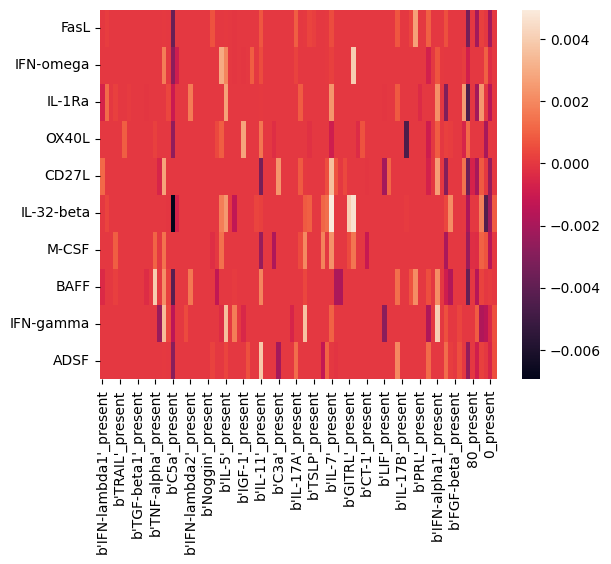

In [14]:
sns.heatmap(df_c)

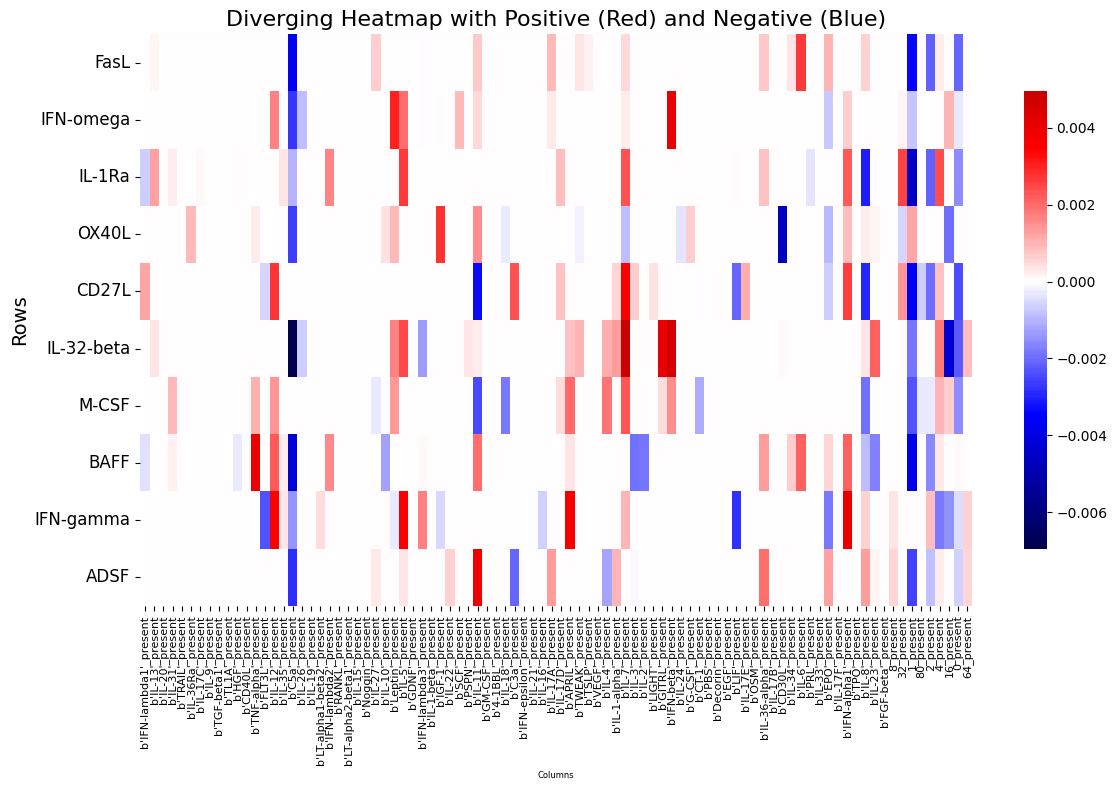

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    df_c,
    cmap="seismic",            # Diverging colormap: blue (negative), gray (neutral), red (positive)
    center=0,                  # Set 0 as the midpoint of the colormap
    linecolor='white',         # Use white borders between cells
    cbar_kws={'shrink': 0.8}   # Shrink the colorbar
)

# Ensure every xtick label is plotted
plt.xticks(ticks=np.arange(len(df_c.columns)) + 0.5,  # Center ticks on heatmap cells
           labels=df_c.columns,                      # Use column names as labels
           rotation=90,                              # Rotate for better visibility
           fontsize=8)                              # Adjust font size for readability
plt.yticks(ticks=np.arange(len(df_c)) + 0.5,         # Center y-ticks on heatmap cells
           labels=df_c.index,                       # Use row indices as labels
           fontsize=12,                             # Adjust font size for readability
           rotation=0)                              # Keep y-axis labels horizontal
plt.title("Diverging Heatmap with Positive (Red) and Negative (Blue)", fontsize=16)
plt.xlabel("Columns", fontsize=6)
plt.ylabel("Rows", fontsize=14)
plt.tight_layout()
plt.show()


In [251]:
df_pvals.min().min()

0.02654281015329499

In [259]:
df_pvals

,b'IL-17C'_present,b'IL-17F'_present,b'PRL'_present,b'IL-24'_present,b'EGF'_present,b'IL-20'_present,b'LIGHT'_present,b'C3a'_present,b'Decorin'_present,b'IL-31'_present,...,b'TSLP'_present,b'OSM'_present,b'IFN-beta'_present,b'Noggin'_present,b'IL-9'_present,b'IL-17B'_present,b'FLT3L'_present,b'C5a'_present,b'IL-26'_present,b'CD40L'_present
b'IL-17C',NaN,0.293195,0.293195,0.293195,0.293195,0.293195,0.293195,0.293195,0.293195,0.293195,...,0.293195,0.293195,0.293195,0.293195,0.293195,0.293195,0.293195,0.293195,0.293195,0.293195
b'IL-17F',0.320665,NaN,0.319065,0.290644,0.385076,0.384040,0.996376,0.395168,0.276929,0.299499,...,0.463328,0.366364,0.273827,0.339307,0.273726,0.289351,0.463625,0.279254,0.409983,0.338008
b'PRL',0.241243,0.435748,NaN,0.215916,0.283755,0.315000,0.818612,0.307062,0.201463,0.213915,...,0.520202,0.884290,0.204267,0.276906,0.201172,0.206373,0.342993,0.218790,0.210192,0.340089
b'IL-24',0.300825,0.410746,0.296028,NaN,0.434970,0.374568,0.278576,0.422491,0.253657,0.270570,...,0.408661,0.492844,0.262974,0.335060,0.255883,0.286246,0.685907,0.258538,0.406511,0.431347
b'EGF',0.322583,0.532413,0.250039,0.283619,NaN,0.431508,0.249123,0.423904,0.249819,0.294739,...,0.520853,0.327484,0.328124,0.357635,0.250966,0.305662,0.489437,0.257903,0.357853,0.340234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b'IL-17B',0.335748,0.502166,0.271263,0.288298,0.359406,0.426079,0.353809,0.405760,0.273268,0.283366,...,0.571304,0.647194,0.394649,0.368457,0.281830,NaN,0.501213,0.282207,0.292731,0.330574
b'FLT3L',0.338854,0.524465,0.280394,0.291139,0.370275,0.415260,0.394979,0.414382,0.285082,0.290244,...,0.559595,0.531741,0.396701,0.388094,0.291859,0.283617,NaN,0.289436,0.287339,0.350230
b'C5a',0.273619,0.314672,0.256279,0.254344,0.350929,0.381346,0.281127,0.315103,0.268200,0.255246,...,0.488768,0.328241,0.429458,0.267833,0.267952,0.269100,0.301705,NaN,0.257155,0.331996
b'IL-26',0.334529,0.488701,0.313498,0.289398,0.369686,0.400486,0.312109,0.401505,0.298705,0.286630,...,0.596601,0.605381,0.382843,0.366862,0.295849,0.286238,0.498608,0.295712,NaN,0.355275


In [242]:
cytokine_cols

['OX40L_present',
 'IL-32-beta_present',
 'IFN-omega_present',
 'M-CSF_present',
 'BAFF_present',
 'FasL_present',
 'CD27L_present',
 'IFN-gamma_present',
 'ADSF_present',
 'IL-1Ra_present']

In [16]:
2909.87+538.69

3448.56

In [186]:
(df_pvals<0.05/11).sum() # signficance without Bonferroni correction

OX40L_present         0
IL-32-beta_present    0
IFN-omega_present     0
M-CSF_present         0
BAFF_present          0
FasL_present          0
CD27L_present         0
IFN-gamma_present     0
ADSF_present          0
IL-1Ra_present        0
dtype: int64

In [255]:
(df_pvals<0.05).sum().sum() # signficance without Bonferroni correction

2

In [258]:
df_pvals.idxmin().idxmin()

"b'TRAIL'_present"